In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv('exchange_rate.csv')
print(df.shape)
df

(7588, 2)


,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [152]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [153]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [154]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


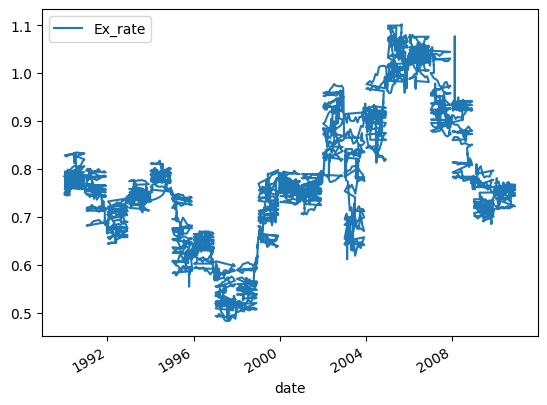

In [155]:
df.set_index('date',inplace=True)
df.index = pd.to_datetime(df.index,format='mixed')
df.dropna(inplace=True)
df.plot()
df

In [156]:
#to check the trend,seasonality and residual we go for stats model
from statsmodels.tsa.seasonal import seasonal_decompose

In [157]:
model = seasonal_decompose(df['Ex_rate'],model='multiplicative',period=1)

<Axes: xlabel='date'>

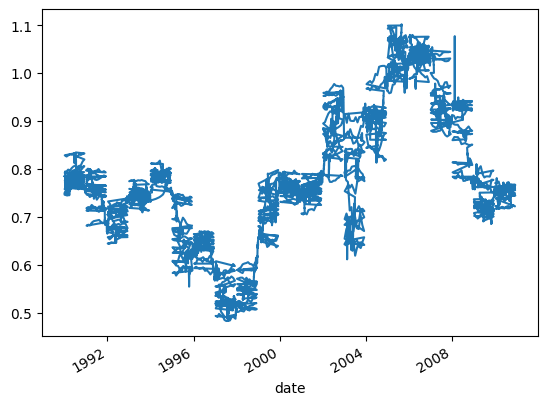

In [158]:
#to check the trend of the data
model.trend.plot()

<Axes: xlabel='date'>

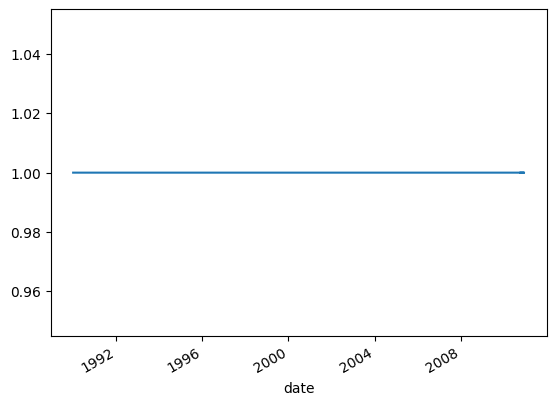

In [159]:
#to check the seasonality of data
model.seasonal.plot()

<Axes: xlabel='date'>

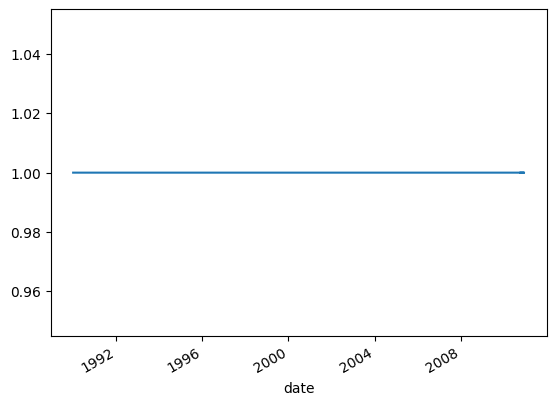

In [160]:
#to check the residual(noise) of the data
model.resid.plot()

we can say that our data is not having any seasonality and residuals so we can go with ARIMA model for forecasting

In [161]:
ts_data = df['Ex_rate']
ts_data_log = np.log(ts_data)

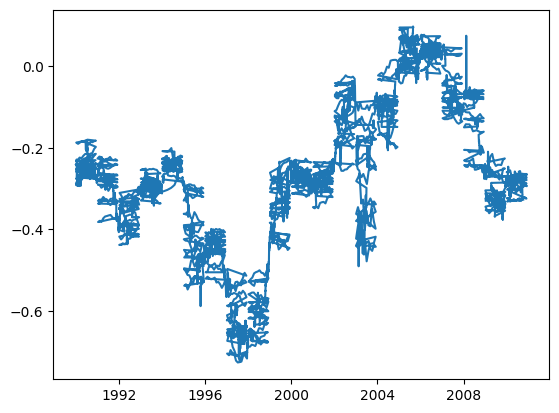

In [162]:
plt.plot(ts_data_log)

in timeseries to go for further process we have to check the stationality of our data with hypothesis testing if our data is not stational we have to make it stational with differencing method 

In [175]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [362]:
def check_stationality(df):
    #calculate rolling mean
    rolmean = df.rolling(window=12).mean()
    rolstd = df.rolling(window=12).std()
    
    #visulaize the plot
    original = plt.plot(df,color='red',label='Original')
    mean = plt.plot(rolmean,color='blue',label='Rolling Mean')
    std = plt.plot(rolstd,color='green',label='Rolling Std')
    plt.legend(loc='best')
    
    print('Results Ducky Fuller Test: \n')
    df_test = adfuller(df)
    my_output = pd.Series(df_test[0:4],index=['Test_Statistic','P value','Lags Used','Number of Observations'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] = j
    print(my_output)

Results Ducky Fuller Test: 

Test_Statistic              -1.664994
P value                      0.449233
Lags Used                    1.000000
Number of Observations    7586.000000
Critical Value (1%)         -3.431212
Critical Value (5%)         -2.861921
Critical Value (10%)        -2.566973
dtype: float64


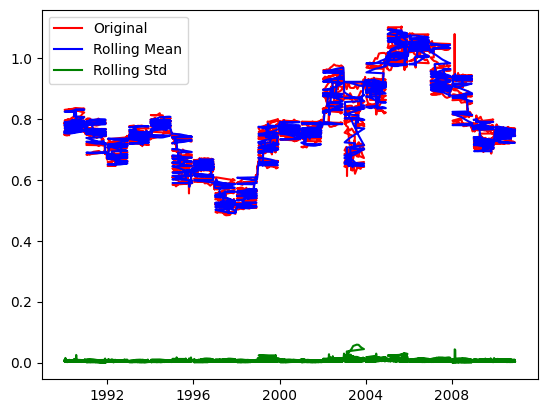

In [363]:
check_stationality(df['Ex_rate'])

from the above diagram and tstas values we can conclude that our data is not stationality 

In [364]:
#converting the data to stationality

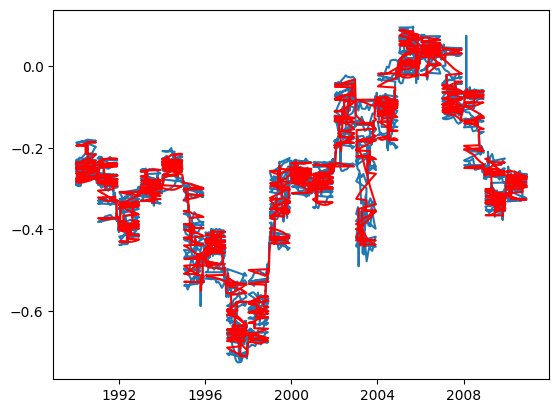

In [365]:
movingaverage = ts_data_log.rolling(window=12).mean()
plt.plot(ts_data_log)
plt.plot(movingaverage,color='red')

In [366]:
#to find the difference minus the ts_data with average
ts_data_log_diff = ts_data_log - movingaverage
ts_data_log_diff.head(50)

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01         NaN
1990-08-01         NaN
1990-09-01         NaN
1990-10-01         NaN
1990-11-01         NaN
1990-12-01    0.007278
1990-01-13    0.005678
1990-01-14    0.006632
1990-01-15   -0.017983
1990-01-16   -0.032204
1990-01-17   -0.034461
1990-01-18   -0.028752
1990-01-19   -0.022119
1990-01-20   -0.016174
1990-01-21   -0.010206
1990-01-22   -0.005944
1990-01-23    0.000269
1990-01-24   -0.007070
1990-01-25   -0.002880
1990-01-26   -0.010623
1990-01-27   -0.012346
1990-01-28   -0.017840
1990-01-29   -0.013426
1990-01-30   -0.012500
1990-01-31   -0.019080
1990-01-02   -0.011571
1990-02-02   -0.001388
1990-03-02    0.003471
1990-04-02    0.003906
1990-05-02    0.011883
1990-06-02    0.012808
1990-07-02    0.011726
1990-08-02    0.005166
1990-09-02    0.003448
1990-10-02    0.006657
1990-11-02    0.000709
1990-12-02   -0.002158
1990-0

In [367]:
ts_data_log_diff.dropna(inplace=True)

In [368]:
ts_data_log_diff

date
1990-12-01    0.007278
1990-01-13    0.005678
1990-01-14    0.006632
1990-01-15   -0.017983
1990-01-16   -0.032204
                ...   
2010-06-10   -0.005526
2010-07-10    0.000023
2010-08-10    0.002650
2010-09-10    0.000022
2010-10-10    0.000510
Name: Ex_rate, Length: 7577, dtype: float64

Results Ducky Fuller Test: 

Test_Statistic           -1.404275e+01
P value                   3.281274e-26
Lags Used                 2.900000e+01
Number of Observations    7.547000e+03
Critical Value (1%)      -3.431217e+00
Critical Value (5%)      -2.861923e+00
Critical Value (10%)     -2.566974e+00
dtype: float64


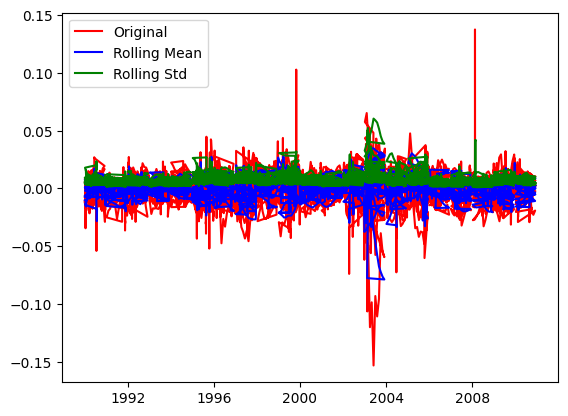

In [369]:
check_stationality(ts_data_log_diff)

In [370]:
movingaverage1 = ts_data_log_diff.rolling(window=12).mean()
ts_data_log_diff2 = ts_data_log_diff - movingaverage1
ts_data_log_diff2

date
1990-12-01         NaN
1990-01-13         NaN
1990-01-14         NaN
1990-01-15         NaN
1990-01-16         NaN
                ...   
2010-06-10    0.008735
2010-07-10    0.012775
2010-08-10    0.013824
2010-09-10    0.009671
2010-10-10    0.008610
Name: Ex_rate, Length: 7577, dtype: float64

In [371]:
ts_data_log_diff2.dropna(inplace=True)

Results Ducky Fuller Test: 

Test_Statistic             -21.871619
P value                      0.000000
Lags Used                   34.000000
Number of Observations    7531.000000
Critical Value (1%)         -3.431219
Critical Value (5%)         -2.861924
Critical Value (10%)        -2.566974
dtype: float64


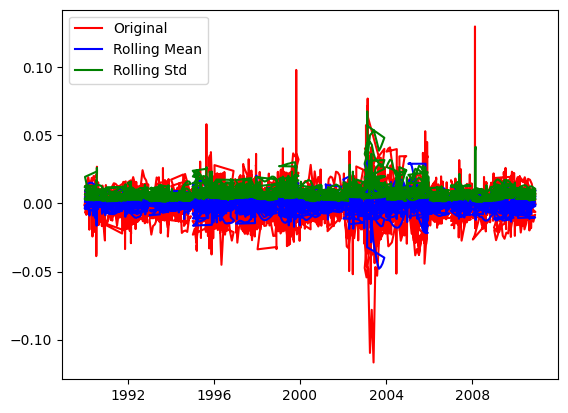

In [372]:
check_stationality(ts_data_log_diff2)

we can see that our data is stationality withe the 2nd time calculating moving average

In [373]:
#import the model arima to check the forecasting 

In [374]:
#before that we have to check the p value and q value from pacf and acf curvue

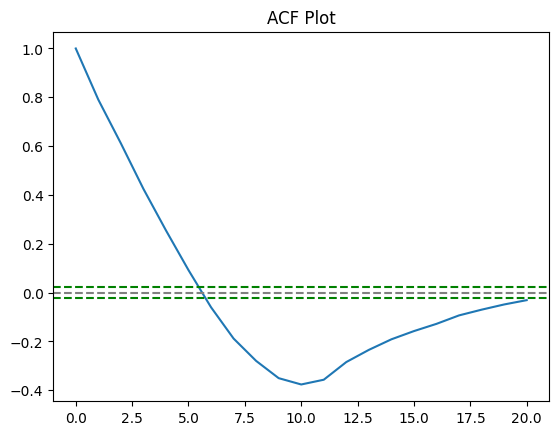

In [375]:
#for q value 
plt.plot(np.arange(0,21),acf(ts_data_log_diff2,nlags=20))
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff2)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff2)),linestyle='--',color='green')
plt.title('ACF Plot')
plt.show()

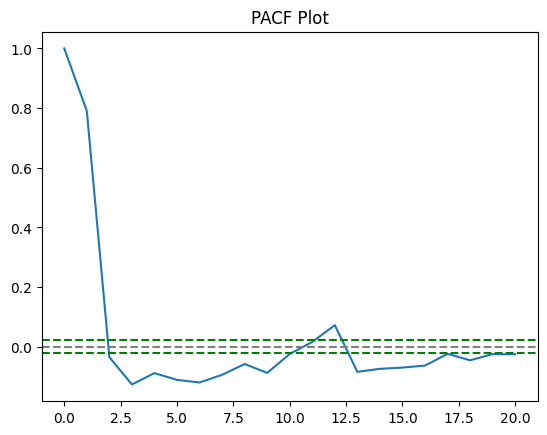

In [376]:
#for p value 
plt.plot(np.arange(0,21),pacf(ts_data_log_diff2,nlags=20))
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff2)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff2)),linestyle='--',color='green')
plt.title('PACF Plot')
plt.show()

In [377]:
#from the above plot the q value = 1 to 5 anynumber lets take(5)
#from the above plot the p value = 1 to 2 anynumber lets take (2)

In [378]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [379]:
model = ARIMA(df['Ex_rate'],order=[2,1,5])

In [380]:
result = model.fit()

In [381]:
result.forecast(100)

7588    0.720798
7589    0.720885
7590    0.720855
7591    0.720819
7592    0.720874
          ...   
7683    0.720849
7684    0.720849
7685    0.720849
7686    0.720849
7687    0.720849
Name: predicted_mean, Length: 100, dtype: float64

In [382]:
result.predict()

date
1990-01-01    0.000000
1990-02-01    0.785500
1990-03-01    0.782289
1990-04-01    0.786051
1990-05-01    0.786146
                ...   
2010-06-10    0.718800
2010-07-10    0.718558
2010-08-10    0.721397
2010-09-10    0.723012
2010-10-10    0.721085
Name: predicted_mean, Length: 7588, dtype: float64

In [383]:
df['forecast'] = result.predict(start=12,end=7587,dynamic=False)

<Axes: xlabel='date'>

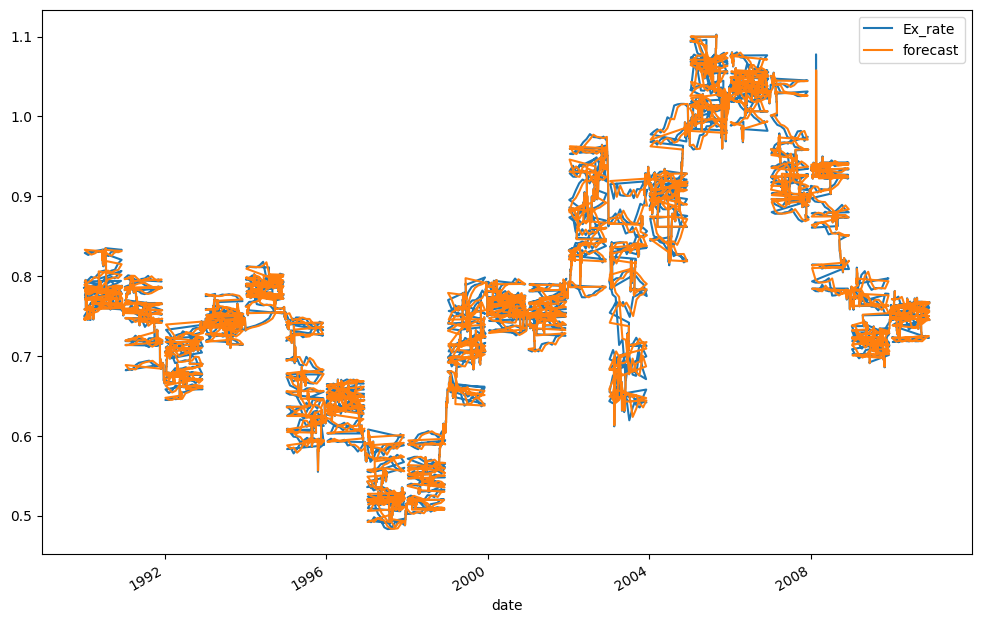

In [384]:
df[['Ex_rate','forecast']].plot(figsize=(12,8))

In [385]:
df

,Ex_rate,forecast
date,,
1990-01-01,0.785500,NaN
1990-02-01,0.781800,NaN
1990-03-01,0.786700,NaN
1990-04-01,0.786000,NaN
1990-05-01,0.784900,NaN
...,...,...
2010-06-10,0.718494,0.718800
2010-07-10,0.721839,0.718558
2010-08-10,0.723197,0.721397


In [386]:
from pandas.tseries.offsets import DateOffset

In [387]:
pred_date = [df.index[-1] + DateOffset(months= x) for x in range(0,36)]
pred_date

[Timestamp('2010-10-10 00:00:00'),
 Timestamp('2010-11-10 00:00:00'),
 Timestamp('2010-12-10 00:00:00'),
 Timestamp('2011-01-10 00:00:00'),
 Timestamp('2011-02-10 00:00:00'),
 Timestamp('2011-03-10 00:00:00'),
 Timestamp('2011-04-10 00:00:00'),
 Timestamp('2011-05-10 00:00:00'),
 Timestamp('2011-06-10 00:00:00'),
 Timestamp('2011-07-10 00:00:00'),
 Timestamp('2011-08-10 00:00:00'),
 Timestamp('2011-09-10 00:00:00'),
 Timestamp('2011-10-10 00:00:00'),
 Timestamp('2011-11-10 00:00:00'),
 Timestamp('2011-12-10 00:00:00'),
 Timestamp('2012-01-10 00:00:00'),
 Timestamp('2012-02-10 00:00:00'),
 Timestamp('2012-03-10 00:00:00'),
 Timestamp('2012-04-10 00:00:00'),
 Timestamp('2012-05-10 00:00:00'),
 Timestamp('2012-06-10 00:00:00'),
 Timestamp('2012-07-10 00:00:00'),
 Timestamp('2012-08-10 00:00:00'),
 Timestamp('2012-09-10 00:00:00'),
 Timestamp('2012-10-10 00:00:00'),
 Timestamp('2012-11-10 00:00:00'),
 Timestamp('2012-12-10 00:00:00'),
 Timestamp('2013-01-10 00:00:00'),
 Timestamp('2013-02-

In [388]:
pred_date_df = pd.DataFrame(index=pred_date[1:],columns =df.columns)
pred_date_df.head()
pred_date_df.tail()

,Ex_rate,forecast
2013-05-10,NaN,NaN
2013-06-10,NaN,NaN
2013-07-10,NaN,NaN
2013-08-10,NaN,NaN
2013-09-10,NaN,NaN


In [389]:
data = pd.concat([df,pred_date_df])

In [390]:
data

,Ex_rate,forecast
1990-01-01,0.7855,NaN
1990-02-01,0.7818,NaN
1990-03-01,0.7867,NaN
1990-04-01,0.7860,NaN
1990-05-01,0.7849,NaN
...,...,...
2013-05-10,NaN,NaN
2013-06-10,NaN,NaN
2013-07-10,NaN,NaN
2013-08-10,NaN,NaN


<Axes: >

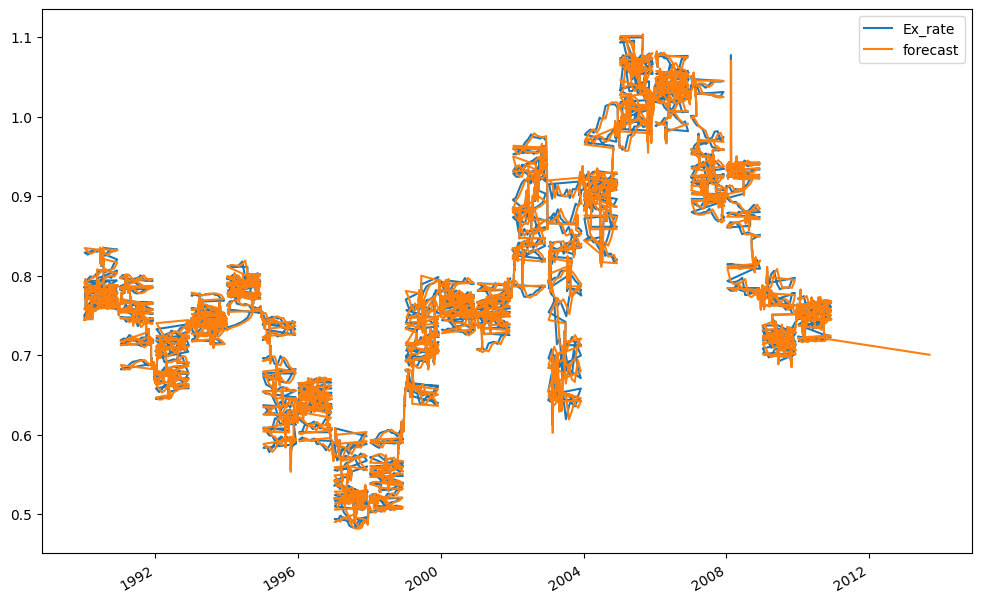

In [393]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Ex_rate'],order=[2,2,4])
result = model.fit()
data['forecast'] = result.predict(start=12,end=7622,dynamic=False)
data[['Ex_rate','forecast']].plot(figsize=(12,8))